In [3]:
import pandas as pd
import glob
import os

# Define the path to the folder containing the CSV files
folder_path = '/content/'

# Use glob to find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Read and concatenate all CSV files
all_dfs = []

for file in csv_files:
    print(f"Reading {file}...")
    df = pd.read_csv(file)
    df['source_file'] = os.path.basename(file)  # Optional: keep track of source
    all_dfs.append(df)

# Concatenate into a single DataFrame
merged_df = pd.concat(all_dfs, ignore_index=True)

# Display basic info
print("All files merged successfully.")
print("Combined DataFrame shape:", merged_df.shape)
print(merged_df.head())


Reading /content/PRSA_Data_Huairou_20130301-20170228.csv...
Reading /content/PRSA_Data_Gucheng_20130301-20170228.csv...
Reading /content/PRSA_Data_Dongsi_20130301-20170228.csv...
Reading /content/PRSA_Data_Wanliu_20130301-20170228.csv...
Reading /content/PRSA_Data_Guanyuan_20130301-20170228.csv...
Reading /content/PRSA_Data_Aotizhongxin_20130301-20170228.csv...
Reading /content/PRSA_Data_Nongzhanguan_20130301-20170228.csv...
Reading /content/PRSA_Data_Shunyi_20130301-20170228.csv...
Reading /content/PRSA_Data_Wanshouxigong_20130301-20170228.csv...
Reading /content/PRSA_Data_Changping_20130301-20170228.csv...
Reading /content/PRSA_Data_Dingling_20130301-20170228.csv...
Reading /content/PRSA_Data_Tiantan_20130301-20170228.csv...
All files merged successfully.
Combined DataFrame shape: (420768, 19)
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0 

In [4]:
# Check how many unique stations are present
print("Unique stations:", merged_df['station'].nunique())
print("Stations:", merged_df['station'].unique())


Unique stations: 12
Stations: ['Huairou' 'Gucheng' 'Dongsi' 'Wanliu' 'Guanyuan' 'Aotizhongxin'
 'Nongzhanguan' 'Shunyi' 'Wanshouxigong' 'Changping' 'Dingling' 'Tiantan']


In [5]:
# Group by station to check data volume
print(merged_df['station'].value_counts())


station
Huairou          35064
Gucheng          35064
Dongsi           35064
Wanliu           35064
Guanyuan         35064
Aotizhongxin     35064
Nongzhanguan     35064
Shunyi           35064
Wanshouxigong    35064
Changping        35064
Dingling         35064
Tiantan          35064
Name: count, dtype: int64


In [6]:
# Strip spaces and lower case for uniformity
merged_df['station'] = merged_df['station'].str.strip().str.lower()


In [7]:
missing_values = merged_df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 No                 0
year               0
month              0
day                0
hour               0
PM2.5           8739
PM10            6449
SO2             9021
NO2            12116
CO             20701
O3             13277
TEMP             398
PRES             393
DEWP             403
RAIN             390
wd              1822
WSPM             318
station            0
source_file        0
dtype: int64


In [8]:
# Example: Drop rows with excessive missing pollution data
merged_df_cleaned = merged_df.dropna(subset=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'])


In [9]:
merged_df['datetime'] = pd.to_datetime(merged_df[['year', 'month', 'day', 'hour']])
merged_df.set_index('datetime', inplace=True)


In [10]:
# General statistics
print("Statistical summary:\n", merged_df.describe())


Statistical summary:
                   No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%        

<ipython-input-11-ba5e1acbf4b3>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pm25 = merged_df['PM2.5'].resample('M').mean()


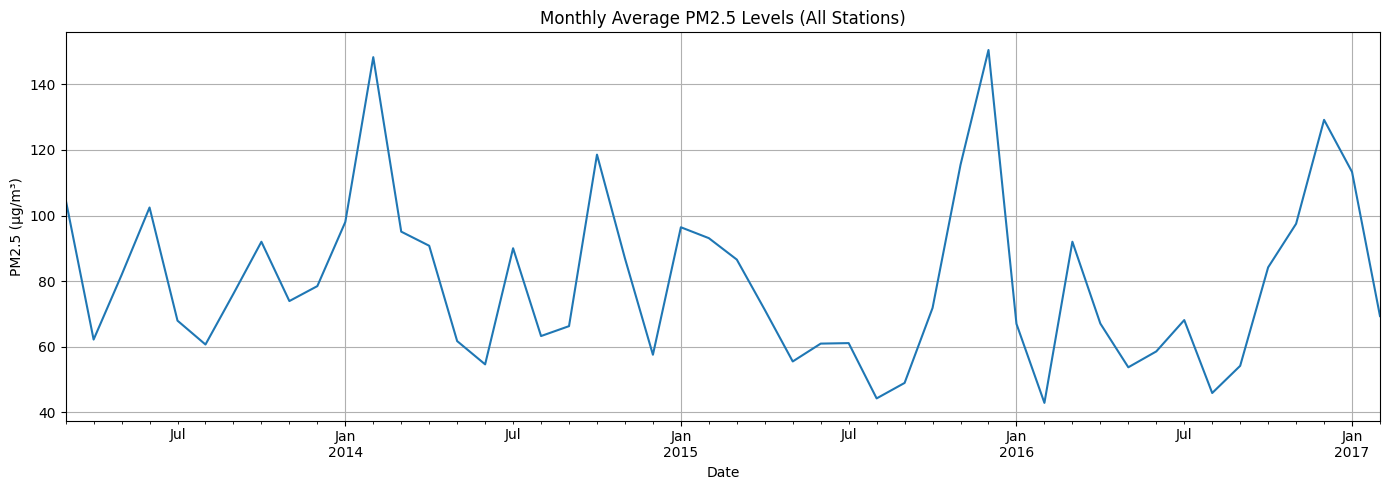

In [11]:
import matplotlib.pyplot as plt

# Average PM2.5 per month across all stations
monthly_pm25 = merged_df['PM2.5'].resample('M').mean()

plt.figure(figsize=(14, 5))
monthly_pm25.plot(title='Monthly Average PM2.5 Levels (All Stations)', ylabel='PM2.5 (µg/m³)', xlabel='Date')
plt.grid(True)
plt.tight_layout()
plt.show()


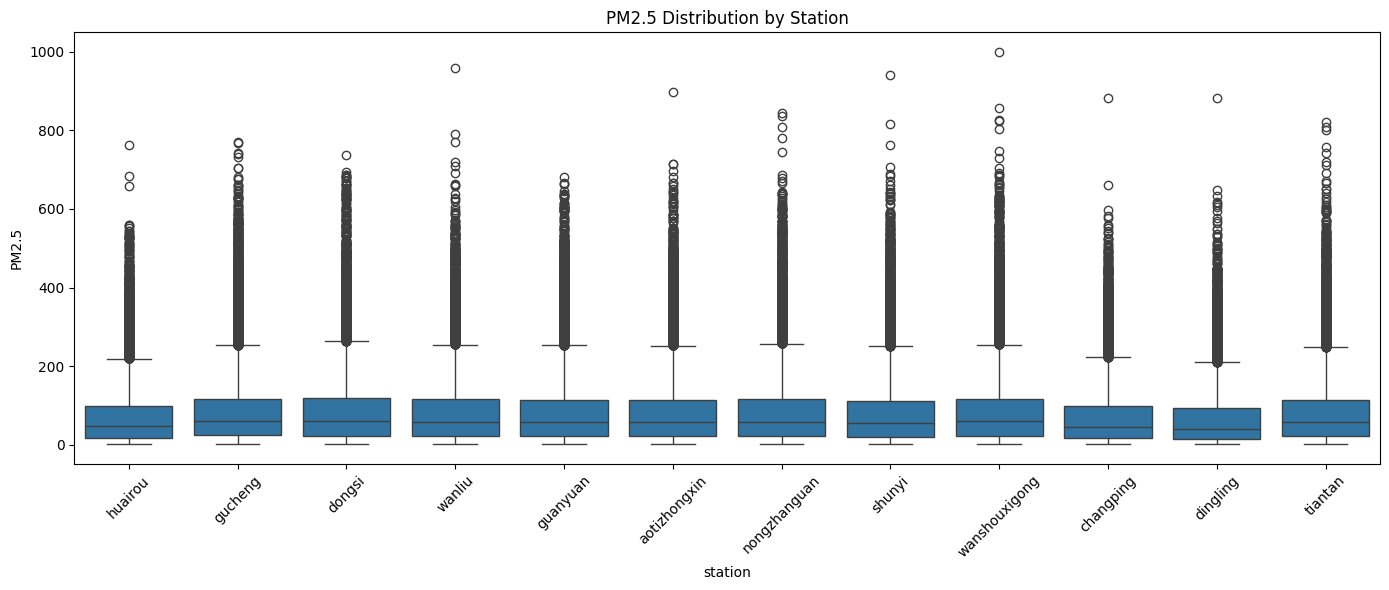

In [13]:
# Reset index to ensure seaborn handles it correctly
plot_df = merged_df.reset_index()

plt.figure(figsize=(14, 6))
sns.boxplot(x='station', y='PM2.5', data=plot_df)
plt.title('PM2.5 Distribution by Station')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


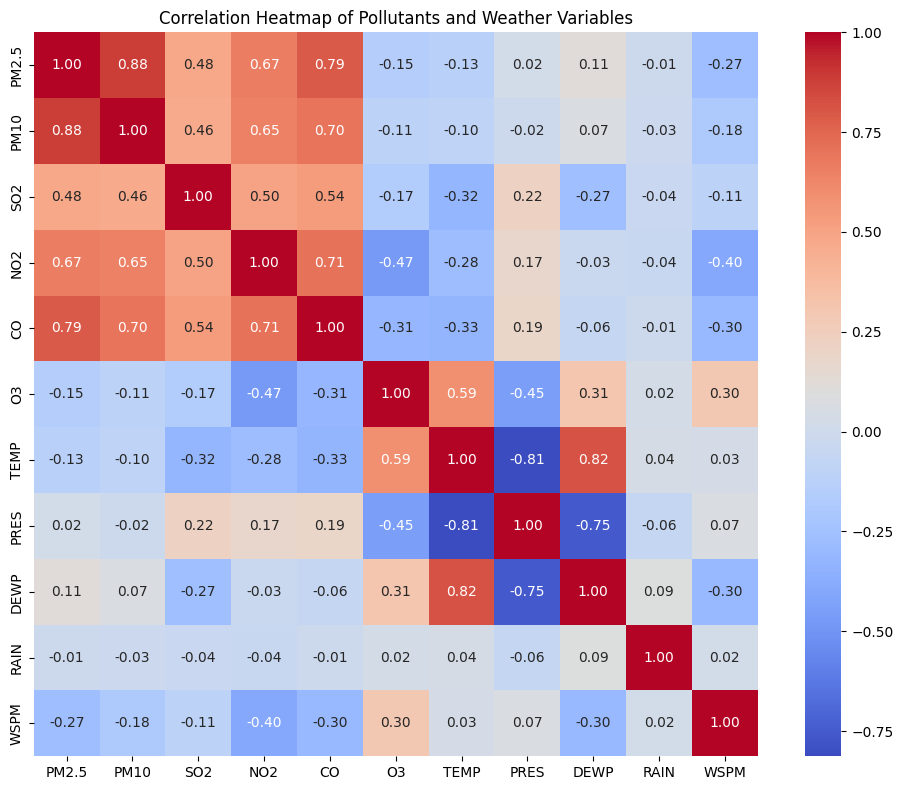

In [14]:
# Numeric correlation matrix
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
corr = merged_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Pollutants and Weather Variables')
plt.tight_layout()
plt.show()


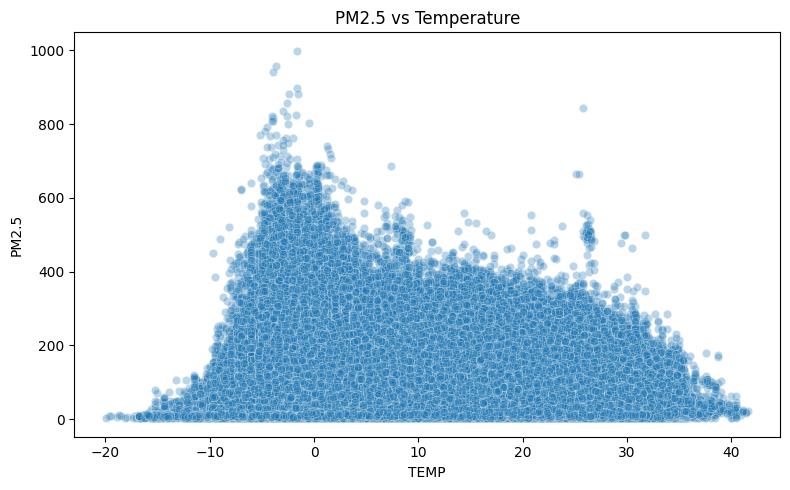

In [16]:
# Reset index before plotting
plot_df = merged_df.reset_index()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=plot_df, x='TEMP', y='PM2.5', alpha=0.3)
plt.title('PM2.5 vs Temperature')
plt.tight_layout()
plt.show()


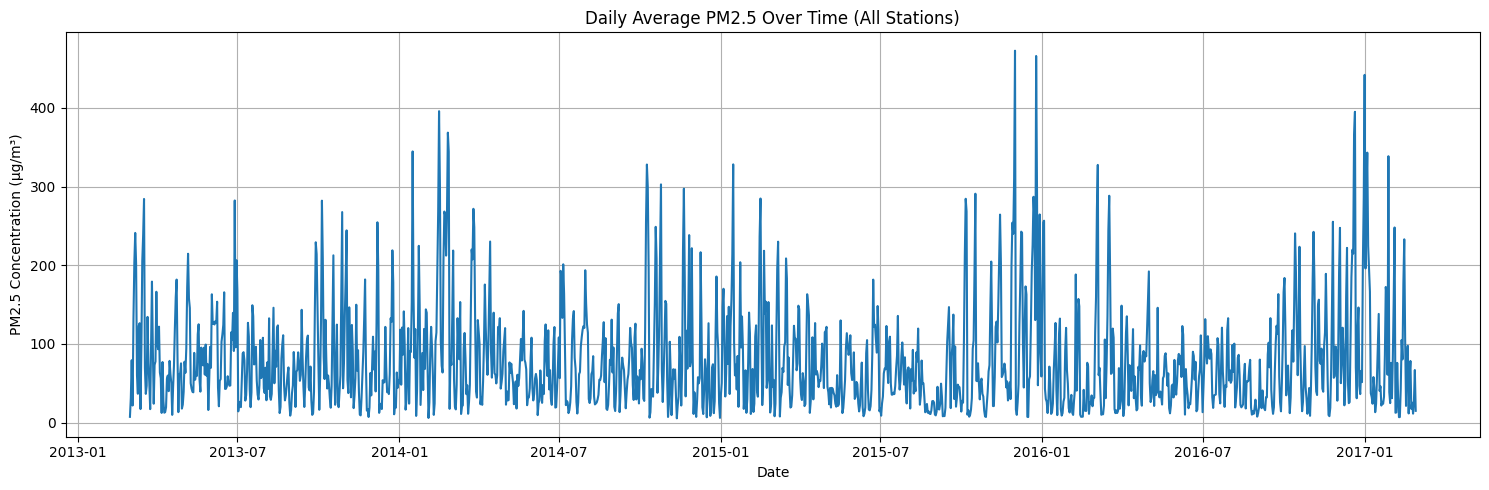

In [17]:
# Calculate daily average PM2.5 for all stations
daily_pm25 = merged_df.groupby(merged_df.index.date)['PM2.5'].mean()

# Plot the trend
plt.figure(figsize=(15, 5))
daily_pm25.plot()
plt.title('Daily Average PM2.5 Over Time (All Stations)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.0000

<Figure size 1000x400 with 0 Axes>

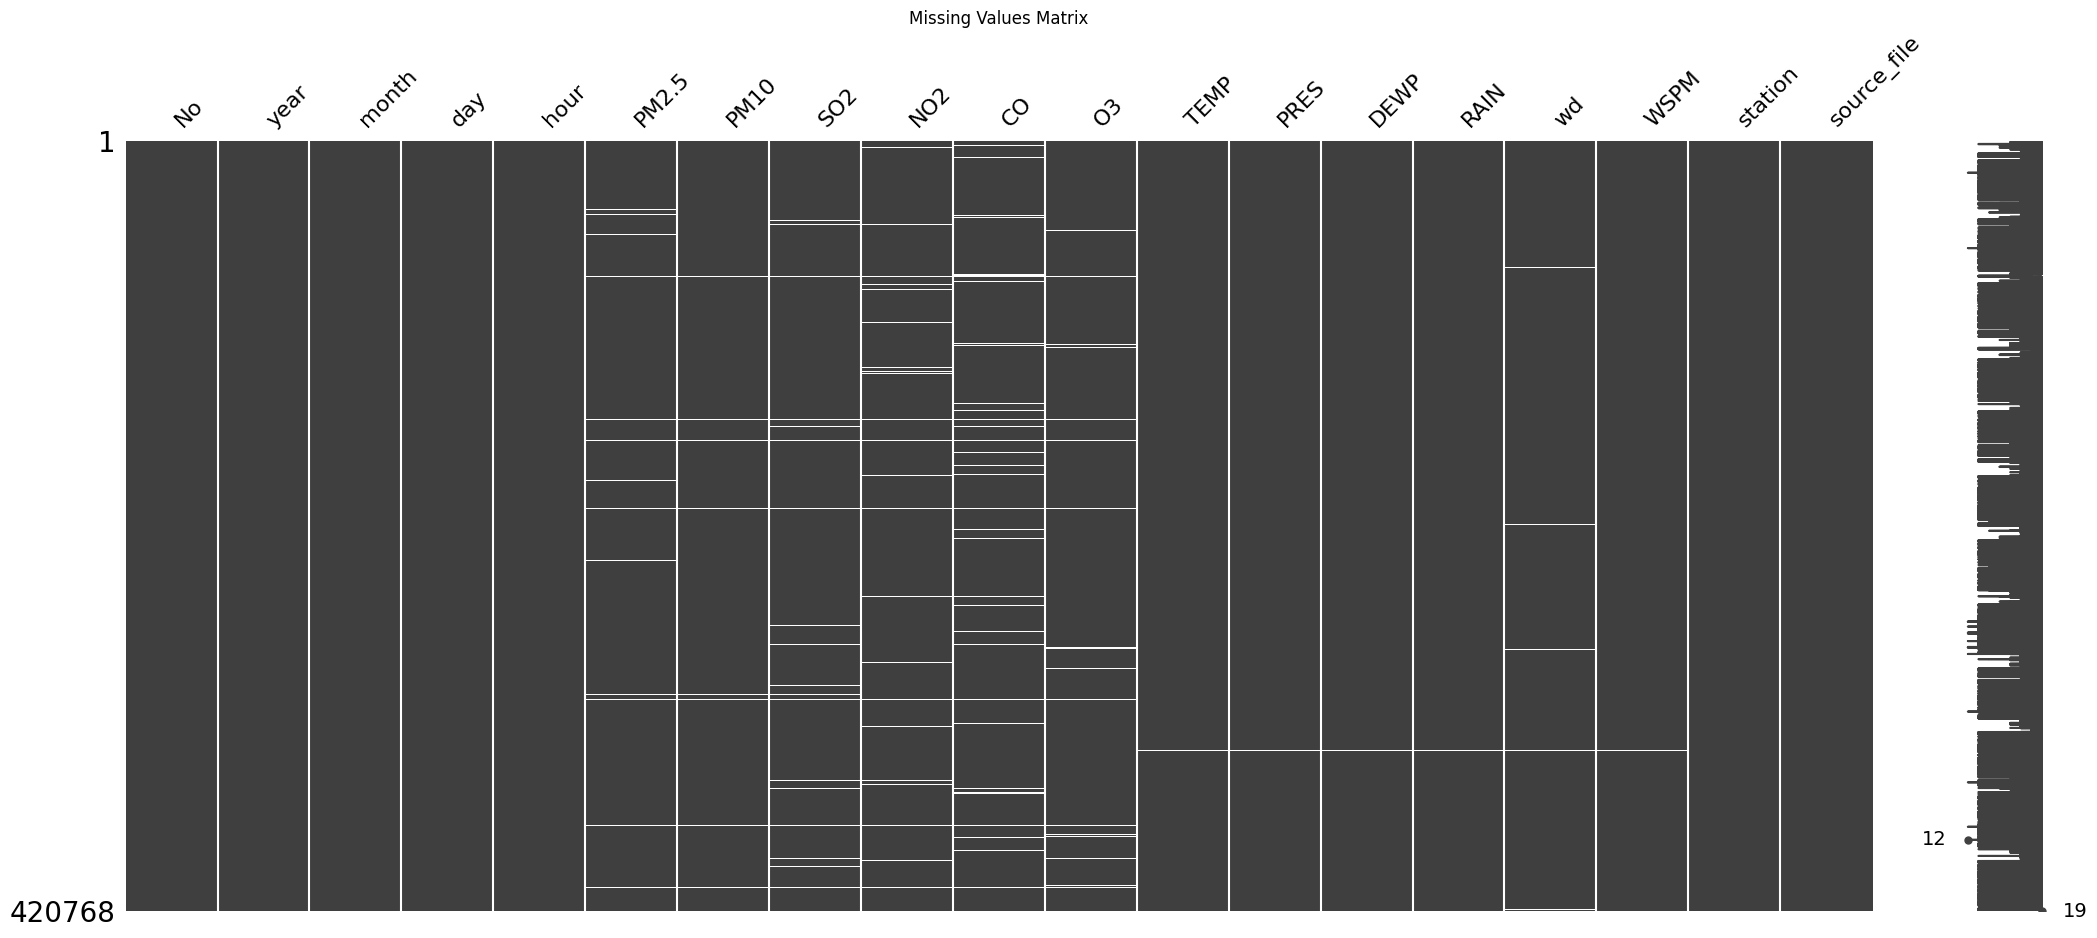

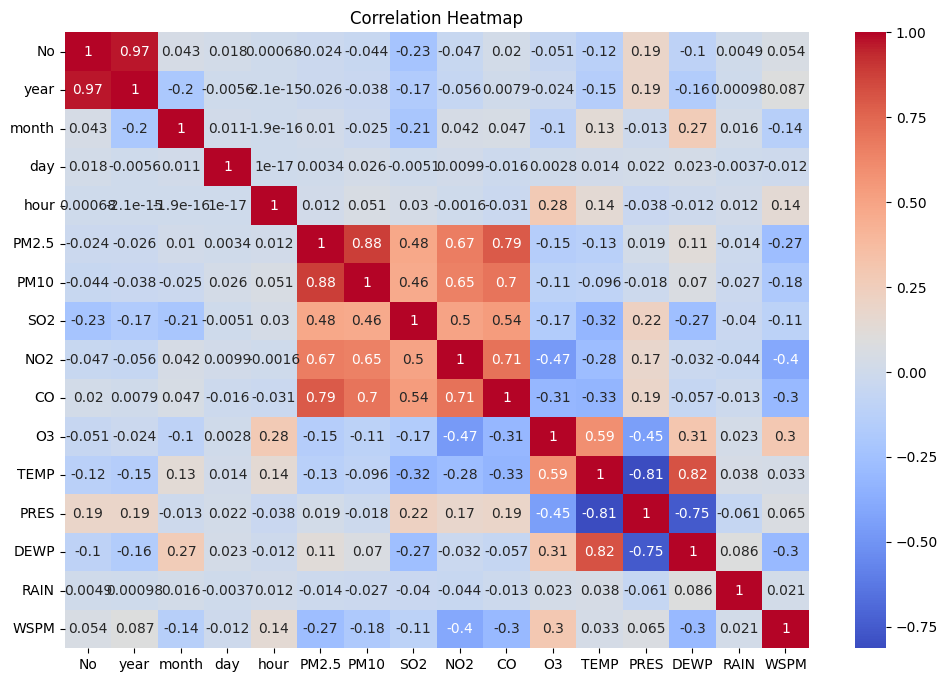

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Summary statistics
print(merged_df.describe())

# Visualize missing values
plt.figure(figsize=(10, 4))
msno.matrix(merged_df)
plt.title("Missing Values Matrix")
plt.show()

# Correlation heatmap (excluding non-numeric)
plt.figure(figsize=(12, 8))
corr = merged_df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Selecting features and target
features = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
target = 'PM2.5'

# Filter out rows where target is missing
model_df = merged_df[features + [target]].dropna(subset=[target])

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(model_df[features])
y = model_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 26.71827689742827
R² Score: 0.6857283908894296
